In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
from collections import Counter
import networkx as nx

In [2]:
def calc_gini(population):
    pop_gini = population
    sorted_pop = sorted(pop_gini)
    n = len(sorted_pop)
    temp_sum = 0.0

    for i in range(n):
        temp_sum += i * sorted_pop[i]

    temp_sum *= 2
    gini_coef = (temp_sum/ (n * sum(sorted_pop))) - ((n + 1) / n)
    return gini_coef

In [148]:
def plot_gini_over_time(pops, Timeshots, add_str=''):
    gini_list = np.zeros(len(pops))
    for i, pop in enumerate(pops):
        gini_list[i] = calc_gini(pop)
    plt.plot(Timeshots[:len(pops)], gini_list)
    plt.xlabel('Iterations',fontsize=13,weight='bold')
    plt.ylabel('Gini coefficient',fontsize=13,weight='bold')
    plt.tight_layout()
    plt.savefig('Plots/gini_over_time'+add_str, dpi=300)

In [178]:
def plot_gini_over_time_diff_beta(pops_list, labels, Timeshots, add_str=''):
    for j, pops in enumerate(pops_list):
        gini_list = np.zeros(len(pops))
        for i, pop in enumerate(pops):
            gini_list[i] = calc_gini(pop)
        plt.plot(Timeshots[:len(pops)], gini_list, label=labels[j])
    plt.xlabel('Iterations',fontsize=13,weight='bold')
    plt.ylabel('Gini coefficient',fontsize=13,weight='bold')
    plt.legend()
    plt.tight_layout()
    plt.savefig('Plots/gini_over_time_diff_beta'+add_str, dpi=300)

## minimum wealth model 1D

In [4]:
def generate_1D(initial_wealth, Timesteps, Timeshots):
    wealth_pop = initial_wealth.copy()
    wealth_timeshots = []
    neighbours = [-1,1]
    fraction = np.random.rand(Timesteps) # fraction at each step to assign money
    time = 0
    
    for step in range(Timesteps): 
        position = np.argmin(wealth_pop)
        next_position = position + random.choice(neighbours)
        
        if next_position == len(wealth_pop):
            next_position = 0
        elif next_position == -1:
            next_position = len(wealth_pop)-1
            
        sum_money = wealth_pop[position] + wealth_pop[next_position]
        e = fraction[step]
        wealth_pop[position] = sum_money*e
        wealth_pop[next_position] = sum_money*(1-e)
        
        if step in Timeshots:
            time += 1
            wealth_step = wealth_pop.copy()
            wealth_timeshots.append(wealth_step)
            
    return wealth_timeshots

In [187]:
simulation = 1
Number = 1024
initial_wealth = np.random.rand(Number)
Steps = int(1e6)
Timeshots = np.arange(0, int(1e6), int(1e4))
wealth_multi = []
for s in range(simulation):
    final_wealth_process = generate_1D(initial_wealth,Steps,Timeshots)
    wealth_multi.append(np.sort(np.array(final_wealth_process[-1])))

wealth_mean_std = np.zeros((2,Number))
wealth_mean_std[0] = np.array(wealth_multi).mean(axis=0)
wealth_mean_std[1] = np.array(wealth_multi).std(axis=0)

In [20]:
np.savetxt('minimum-1D',wealth_mean_std)

#### Plot Gini over time for 1D minimal wealth model

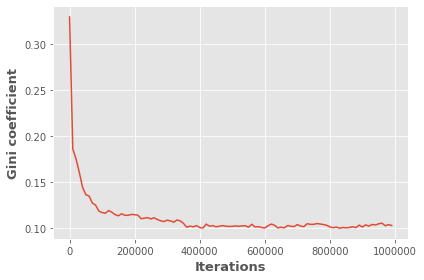

In [188]:
plot_gini_over_time(final_wealth_process, Timeshots, '1D_minimal_wealth')

## minimum wealth model 2D

In [26]:
def transcations(G2d,Steps):
    fraction = np.random.rand(Steps) 
    for step in range(Steps):
        min_wealth = 1000
        min_position = np.zeros(1)
        for key,values in G2d.nodes.data():
            if values['wealth'] < min_wealth:
                min_wealth = values['wealth']
                min_position = key
            
        neighbours = list((dict(G2d.adj[min_position]).keys()))
        neigh_list = np.arange(len(neighbours))
        neigh_position = neighbours[np.random.choice(neigh_list)]
        e = fraction[step]
        sum_wealth = G2d.nodes[min_position]['wealth']+ G2d.nodes[neigh_position]['wealth']
        G2d.nodes[min_position]['wealth'] = sum_wealth*e
        G2d.nodes[neigh_position]['wealth'] = sum_wealth*(1-e)
    return G2d

In [27]:
ax1 = 32
ax2 = 32
simulation = 10
Number = ax1*ax2
wealth_multi_min2 = []
initial_wealth = np.random.rand(Number)
G2d = nx.grid_2d_graph(ax1,ax2)
for index, node in enumerate(G2d.nodes()):
    G2d.nodes[node]['wealth']= initial_wealth[index] 

In [28]:
step_list = [1000,10000,100000,1000000]
test_result = []
for s in step_list:   
    print(s)
    final_G2d = transcations(G2d,s)
    final_wealth_list = list(dict(final_G2d.nodes.data()).values())
    final_wealth_list = list(dict(final_G2d.nodes.data()).values())
    final_wealth2d = np.array([x['wealth'] for x in final_wealth_list])
    test_result.append(final_wealth2d)

1000
10000
100000
1000000


KeyboardInterrupt: 

In [41]:
test_result

[array([0.4584441 , 0.27219171, 0.3568357 , ..., 0.90044485, 0.25469446,
        0.57214697]),
 array([0.4584441 , 0.50040104, 0.5036232 , ..., 0.51008998, 0.3368765 ,
        0.57214697]),
 array([0.57176755, 0.47688023, 0.4417317 , ..., 0.70716601, 0.46462093,
        0.39234579]),
 array([0.38138483, 0.54164519, 0.41437798, ..., 0.39229099, 0.36695619,
        0.42459735])]

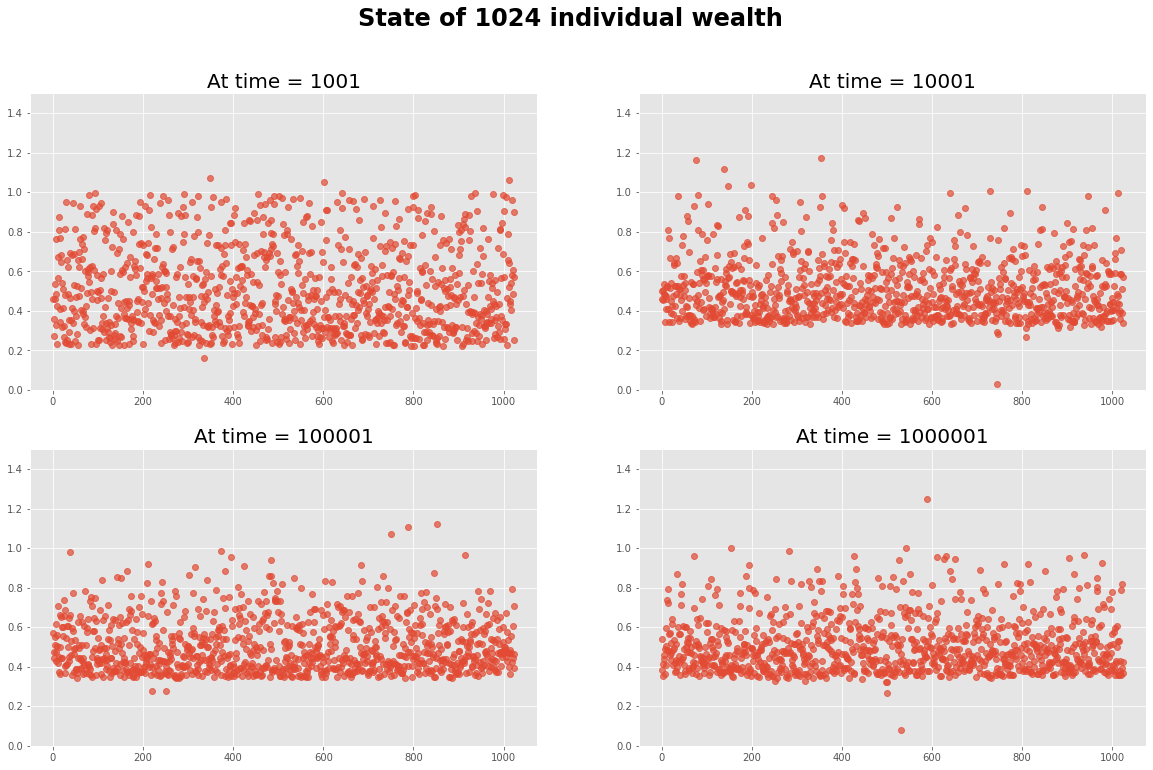

In [45]:
plt.figure(figsize=(20,12))
plt.suptitle("State of {} individual wealth".format(Number),weight='bold',fontsize='24')
for i, wealth in enumerate(test_result):
    X = np.arange(1,1025,1)
    plt.subplot(2,2,i+1)
    plt.title("At time = {}".format(step_list[i]+1),fontsize=20)
    plt.plot(X,wealth,'o',alpha=0.7)
    #plt.plot([0,1024],[,1.5],'k--',linewidth=2.0)
    plt.ylim(0,1.5)

In [46]:
wealth_multi_min2d = []
step_min2d = 1000000
for si in range(simulation):
    print(si)
    final_G2d_simu = transcations(G2d,step_min2d)
    final_wealth_list_simu = list(dict(final_G2d_simu.nodes.data()).values())
    final_wealth_list_simu = list(dict(final_G2d_simu.nodes.data()).values())
    final_wealth2d_simu = np.array([x['wealth'] for x in final_wealth_list_simu])
    wealth_multi_min2d.append(np.sort(final_wealth2d_simu))

0
1
2
3
4
5
6
7
8
9


In [47]:
wealth_multi_min2d

[array([0.1483058 , 0.28192995, 0.29336744, ..., 1.1137637 , 1.15488497,
        1.1565803 ]),
 array([0.0633212 , 0.28464893, 0.29950966, ..., 1.13629653, 1.20025806,
        1.2797712 ]),
 array([0.16204134, 0.31762241, 0.33217144, ..., 1.00436384, 1.07348443,
        1.10889908]),
 array([0.09187892, 0.32003089, 0.33229806, ..., 1.05247942, 1.07867717,
        1.21083539]),
 array([0.32753673, 0.34872341, 0.35259525, ..., 1.06418473, 1.06593158,
        1.17995534]),
 array([0.34293117, 0.34539938, 0.34794545, ..., 1.014666  , 1.29153898,
        1.30924101]),
 array([0.02142894, 0.3028622 , 0.30633458, ..., 1.028825  , 1.12081498,
        1.1521979 ]),
 array([0.020875  , 0.34894351, 0.3510529 , ..., 1.04947884, 1.07300876,
        1.08799775]),
 array([0.24674148, 0.3075379 , 0.3405113 , ..., 1.08852957, 1.09626057,
        1.11725852]),
 array([0.05756348, 0.26167511, 0.27073253, ..., 1.09857436, 1.15593552,
        1.17314774])]

In [48]:
wealth_mean_std_min2d = np.zeros((2,Number))
wealth_mean_std_min2d[0] = np.array(wealth_multi_min2d).mean(axis=0)
wealth_mean_std_min2d[1] = np.array(wealth_multi_min2d).std(axis=0)

In [49]:
np.savetxt('minimum-2D',wealth_mean_std_min2d)

#### Minimal Wealth on Network

In [134]:
def transcations_nw(nw, n_steps):
    fractions = np.random.rand(n_steps) 
    for step in range(n_steps):        
        wealth = np.array(list(zip(*list(nw.nodes(data='wealth'))))[1])
        min_position = np.argmin(wealth)
        min_wealth = wealth[min_position]
        neighbours = list(rand_nw.neighbors(min_position))        
        neigh_position = random.choice(neighbours)
        e = fractions[step]
        sum_wealth = nw.nodes[min_position]['wealth']+nw.nodes[neigh_position]['wealth']
        nw.nodes[min_position]['wealth'] = sum_wealth*e
        nw.nodes[neigh_position]['wealth'] = sum_wealth*(1-e)
    return nw

In [142]:
def degree_wealth_plot(nw, add_str=''):
    wealth = np.array(list(zip(*list(nw.nodes(data='wealth'))))[1])
    degree = np.array(list(zip(*list(nw.degree())))[1])
    df = pd.DataFrame([wealth, degree]).T
    df.columns =['Wealth', 'Degree']
    avg = df.groupby('Degree').mean()
    plt.scatter(avg.index, avg)
    plt.xscale('log')
    plt.title('Average wealth of network degree',fontsize=13,weight='bold')
    plt.xlabel('Degree',fontsize=13,weight='bold')
    plt.ylabel('Average Wealth',fontsize=13,weight='bold')
    plt.tight_layout()
    plt.savefig('Plots/degree_wealth'+add_str, dpi=300)
    plt.show()

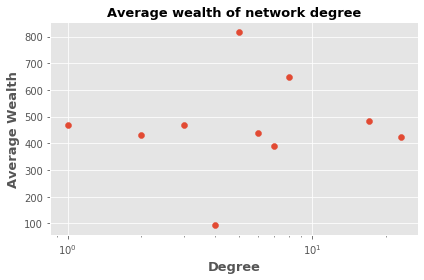

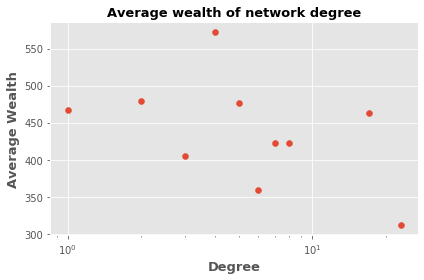

Wall time: 6.24 s


In [144]:
%%time
N = 100
n_steps = 100000
# k = 2
# p = 0.01
m = 1
# rand_nw = nx.gnp_random_graph(N, p)
# rand_nw = nx.watts_strogatz_graph(N, k, p)
rand_nw = nx.barabasi_albert_graph(N, m)

initial_wealth = 1000*np.random.rand(N)
for index, node in enumerate(rand_nw.nodes()):
    rand_nw.nodes[node]['wealth']= initial_wealth[index]

degree_wealth_plot(rand_nw, 'min_wealth_init')
final_nw = transcations_nw(rand_nw, n_steps)
degree_wealth_plot(final_nw, 'min_wealth_end')

## Growing economy 1D

In [33]:
def initial_distribution(type):
    if type == 'exponential':
        return np.random.exponential(50, 10)
    if type == 'powerlaw':
        return np.random.pareto(.5)
    if type == 'pareto':
        return np.random.pareto(.5)
    if type == 'uniform':
        return np.random.rand() 
    
def wealth_power(wealth, beta):
    return np.power(wealth, beta)

def calc_gini_col(df, beta):
    return calc_gini(df[beta])

##### For Running different experiments (since they are stochastic)

In [159]:
# global variables
total_pop = 1024
beta = 1
# beta_array = np.linspace(0.1,0.2,2) #test
market_growth_rate = 0.1
delta_omega = 0.01
time_period = 10

#create population
results_dict = {}
gini_list = []

pop = np.empty(total_pop, dtype=object)
for i in range(len(pop)):
    pop[i] = initial_distribution('uniform')

max_iter = np.sum(pop) * (np.exp(market_growth_rate* time_period ) -1)/delta_omega
pop_ids = np.arange(len(pop), dtype='float64')

print('Max number of iterations:', int(max_iter))
simulation = 1
growing_multi = []

pops = []
Timeshots = np.arange(0, int(90000), int(1000))

print(max_iter)
for simu in range(simulation):
    #print(f'Beta: {beta}')
    pop = np.empty(total_pop)
    for i in range(len(pop)):
        pop[i] = initial_distribution('uniform')
    chances = np.array(wealth_power(pop, beta), dtype='float64')
    sum_chances = sum(chances)
    for iter in range(int(max_iter)):        
        decision_pos = int(np.random.choice(pop_ids,p=chances/sum_chances))
        pop[decision_pos] += delta_omega
        new_wealth = wealth_power(pop[decision_pos], beta)
        sum_chances += new_wealth - chances[decision_pos]
        chances[decision_pos] = new_wealth
        if iter in Timeshots:
            pops.append(pop.copy())
    growing_multi.append(np.sort(np.array(pop)))
    #df = pd.DataFrame(results_dict)
    #df.to_pickle("./results_test_1.pkl")

Max number of iterations: 88237
88237.76960742762


##### For different beta

In [167]:
# global variables
total_pop = 1024
# beta_array = np.linspace(0.1,3,30)
# beta_array = np.linspace(0.1,0.2,2) #test
beta_array = [0.3, 1, 3]
market_growth_rate = 0.1
delta_omega = 0.01
time_period = 10

#create population
results_dict = {}
gini_list = []

pop = np.empty(total_pop, dtype=object)
for i in range(len(pop)):
    pop[i] = initial_distribution('uniform')

max_iter = np.sum(pop) * (np.exp(market_growth_rate* time_period ) -1)/delta_omega
pop_ids = np.arange(len(pop), dtype='float64')

print('Max number of iterations:', int(max_iter))
pops_list = []
Timeshots = np.arange(0, int(90000), int(1000))

for beta in beta_array:
    print(f'Beta: {beta}')
    pops = []
    pop = np.empty(total_pop, dtype=object)
    for i in range(len(pop)):
        pop[i] = initial_distribution('uniform')
    chances = np.array(wealth_power(pop, beta), dtype='float64')
    sum_chances = sum(chances)
    for iter in range(int(max_iter)):        
        decision_pos = int(np.random.choice(pop_ids,p=chances/sum_chances))
        pop[decision_pos] += delta_omega
        new_wealth = wealth_power(pop[decision_pos], beta)
        sum_chances += new_wealth - chances[decision_pos]
        chances[decision_pos] = new_wealth
        if iter in Timeshots:
            pops.append(pop.copy())
    results_dict[beta] = pop
    df = pd.DataFrame(results_dict)
    pops_list.append(pops)

Max number of iterations: 86809
Beta: 0.3
Beta: 1
Beta: 3


In [175]:
len(Timeshots)

90

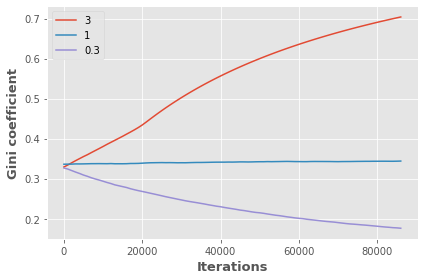

In [181]:
plot_gini_over_time_diff_beta(list(reversed(pops_list)), list(reversed(['0.3', '1', '3'])), Timeshots)

In [20]:
Number = 1024
wealth_mean_std_grow = np.zeros((2,Number))
wealth_mean_std_grow[0] = np.array(growing_multi).mean(axis=0)
wealth_mean_std_grow[1] = np.array(growing_multi).std(axis=0)

In [22]:
np.savetxt('growing-1D',wealth_mean_std_grow)

## local redistribution model

In [108]:
def locate_simulation():
    pop = nx.Graph()
    current_persons, wealths = np.array([]), np.array([])
    pop_size = 1024
    gamma = 0.5
    beta1, beta2 = 1, 10

    # DO FIRST ITERATION EXPLICIT
    pop.add_node(0, wealth=0, ability=np.random.beta(beta1, beta2))
    current_persons = np.append(current_persons, 0)
    # print(pop.nodes[0]['wealth'])
    wealths = np.append(wealths, pop.nodes[0]['wealth'])
    
    pops = []
    Timeshots = np.arange(0, pop_size, 10)
    # RUN MODEL FOR GIVEN POPULATION SIZE
    for person in range(1, pop_size):
        #if person % 1023 == 0:
            #print("step", int(person/1000),"/10")
        
        # add node
        pop.add_node(person, wealth=0, ability=np.random.beta(beta1, beta2))
        current_persons = np.append(current_persons, person)
        wealths = np.append(wealths, pop.nodes[person]['wealth'])

        # determine to which node is linked
        if sum(wealths) > 0:
            linked = np.random.choice(current_persons, p = wealths/sum(wealths))
        else:
            linked = np.random.choice(current_persons)
        pop.add_edge(linked, person)

        # produce wealth
        for node in pop.nodes:
            wealth_produced = np.random.binomial(pop.degree[node], pop.nodes[node]['ability'])
            wealths[node] += wealth_produced
            pop.nodes[node]['wealth'] += wealth_produced

            # local redistribution
            if len(list(pop.neighbors(node))) > 0:

                portion = gamma/len(list(pop.neighbors(node)))
                wealths[node] -= gamma * wealth_produced
                pop.nodes[node]['wealth'] -= gamma * wealth_produced

                for neighbor in pop.neighbors(node):
                    neighbor = int(neighbor)
                    wealths[neighbor] += portion * wealth_produced
                    pop.nodes[neighbor]['wealth'] += portion * wealth_produced
                
        if person in Timeshots:
            pops.append(wealths)
    return pop, wealths, pops, Timeshots

In [183]:
pop, wealths, pops, Timeshots = locate_simulation()

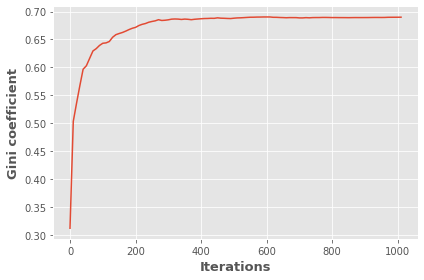

In [184]:
plot_gini_over_time(pops, Timeshots, '_Growing_Network')

In [116]:
simulations = 3
all_wealths, all_degrees = np.array([]), np.array([])

for simu in range(simulations):
    if simu % 9 == 0:
        print(simu)
        
    pop, wealths, pops, Timeshots = locate_simulation()
    wealths =  np.sort(wealths)

    all_wealths = np.append(all_wealths, wealths)
    all_degrees = np.append(all_degrees, np.array(pop.degree)[:,1])

averages, deviations = np.array([]), np.array([])
pop_size = int(len(all_wealths)/simulations)

for j in range(pop_size):
    jth_poorest = all_wealths[j:pop_size+j+1:pop_size]

    averages = np.append(averages, np.average(jth_poorest))
    deviations = np.append(deviations, np.std(jth_poorest))

average_wealth_and_dev = np.array([averages,deviations])

0


In [85]:
average_wealth_and_dev

array([[0.00000000e+00, 2.60416667e-02, 4.03225806e-02, ...,
        4.00822284e+03, 4.56838248e+03, 6.52462504e+03],
       [0.00000000e+00, 2.60416667e-02, 4.03225806e-02, ...,
        1.32688197e+03, 8.55580199e+02, 7.76258337e+02]])

In [86]:
np.savetxt('locate-2D',average_wealth_and_dev)

In [113]:
def plot_wealth_and_degree(all_degrees, all_wealths):
    points = 100
    checking_wealths = np.logspace(-4, 0,points)
    observed_wealths = np.zeros(points)
    len_wealth = len(all_wealths)

    for i, x in enumerate(checking_wealths):
        observed_wealths[i] = len(np.where(all_wealths > x)[0])/len_wealth

    plt.plot(checking_wealths,observed_wealths,'--',color='blue')
    plt.xscale('log')
    #plt.yscale('log')
    plt.title('Probability density of wealth',fontsize=13,weight='bold')
    plt.xlabel('log(wealth)',fontsize=13,weight='bold')
    plt.ylabel('probability',fontsize=13,weight='bold')
    plt.show()

    checking_degrees = np.logspace(0, 3,points)
    observed_degrees = np.zeros(points)
    len_degrees = len(all_degrees)

    for i, x in enumerate(checking_degrees):
        observed_degrees[i] = len(np.where(all_degrees > x)[0])/len_degrees

    plt.plot(checking_degrees,observed_degrees,'--',color='blue')
    plt.xscale('log')
    #plt.yscale('log')
    plt.title('Probability density of network degree',fontsize=13,weight='bold')
    plt.xlabel('log(degree)',fontsize=13,weight='bold')
    plt.ylabel('probability',fontsize=13,weight='bold')
    plt.show()

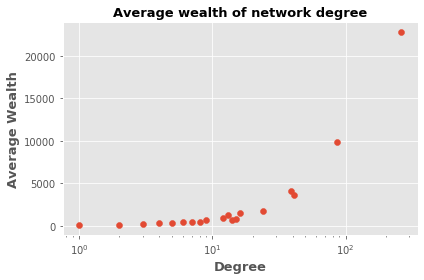

In [147]:

'''
TURN THIS ON TO SEE PLOTS
'''
# plot_wealth_and_degree(all_degrees, all_wealths)
degree_wealth_plot(pop, 'Growing_Network')


'''
TURN THIS ON IF YOU WANT TO SAVE THE ARRAY
'''
np.save("wealths1", wealths)

## plotting 

### lorenz curve

In [26]:
mini_1D = np.loadtxt("Minimum-1D", delimiter=' ')
mini_2D = np.loadtxt("Minimum-2D", delimiter=' ')
growing_1D = np.loadtxt("growing-1D", delimiter=' ')
growing_2D = np.loadtxt("locate-2D", delimiter=' ')

In [27]:
wealth_all_models = [mini_1D,mini_2D,growing_1D,growing_2D]

In [31]:
def stochastic_lorenz(wealth_mean_std_all,label): 
        plt.figure(figsize=(6,6))
        dx = 1/len(wealth_mean_std_all[0][0])
        X = np.arange(dx,1+dx,dx)
        for i,wealth_mean_std in enumerate(wealth_mean_std_all):
            wealth_mean_std = wealth_mean_std.T[np.lexsort(wealth_mean_std[::-1,:])].T
            sort_mean = wealth_mean_std[0]
            sort_std = wealth_mean_std[1]
            lorenz_mean = sort_mean.cumsum()/sort_mean.sum()
            lorenz_std = sort_std/sort_mean.sum()
            plt.scatter(X, lorenz_mean, 
                marker='x',s=5,label='{}'.format(label[i]))  
            plt.fill_between(X,lorenz_mean - lorenz_std, 
                             lorenz_mean + lorenz_std, alpha=0.2)
        plt.plot([0,1], [0,1], color='k',label='equality line')
        plt.legend()
        plt.xlabel('Number of individuls',fontsize=12, weight='bold')
        plt.ylabel('Cumulative wealth',fontsize=12, weight='bold')
        plt.title("Lorenz Curve of the population", fontsize=12, weight='bold')

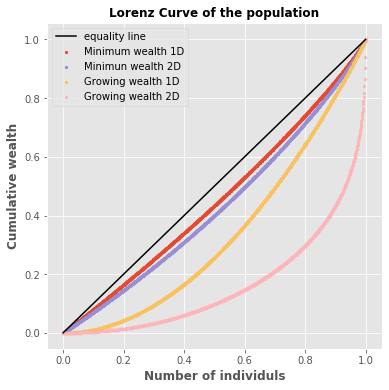

In [32]:
label = ['Minimum wealth 1D','Minimun wealth 2D', 'Growing wealth 1D', 'Growing wealth 2D']
stochastic_lorenz(wealth_all_models,label)

### Gini coefficient

In [38]:
gini_min1D = calc_gini(mini_1D[0])
gini_min2D = calc_gini(mini_2D[0])
gini_grow1D = calc_gini(growing_1D[0])
gini_grow2D = calc_gini(growing_2D[0])

In [39]:
print("Gini coefficent of minimum wealth 1-D model",gini_min1D)
print("Gini coefficent of minimum wealth 2-D model",gini_min2D)
print("Gini coefficent of growing economy 1-D model",gini_grow1D)
print("Gini coefficent of growing economy 2-D model",gini_grow2D)

Gini coefficent of minimum wealth 1-D model 0.09308171127073894
Gini coefficent of minimum wealth 2-D model 0.1390688614583282
Gini coefficent of growing economy 1-D model 0.3251451737594533
Gini coefficent of growing economy 2-D model 0.669422202752767


### log-log plot (whole population)

In [ ]:
def cumu_percentile_people(wealth_mean_std_all,label):
    plt.figure(figsize=(8,6))
    for i,wealth_mean_std in enumerate(wealth_mean_std_all):
        final_wealth = wealth_mean_std[0]
        sort_dewealth = -np.sort(-final_wealth)/max(final_wealth)
        percentile_people = np.array(list(Counter(sort_dewealth).values()))
        X_wealth = list(Counter(sort_dewealth).keys())
        cumuper_people = percentile_people.cumsum()/len(final_wealth)
        print(len(X_wealth),len(cumuper_people))
        
        plt.scatter(X_wealth,cumuper_people,label='{}'.format(label[i]))
        plt.xlabel('Wealth',fontsize=12, weight='bold')
        plt.ylabel('Cumulative precentile of people',fontsize=12, weight='bold')
        plt.title('Cumulative percentile of people with decreasing wealth',
                  fontsize=12, weight='bold')        
        plt.legend() 
    
#         plt.subplot(122)
#         plt.loglog(sort_dewealth,cumuper_people,'o', markersize=3,color='chartreuse')
#         plt.xlabel('log(wealth)',fontsize=12, weight='bold')
#         plt.ylabel('Log(cumulative percentile)',fontsize=12, weight='bold')
#         plt.title('Log-log cumulative percentile',
#                   fontsize=12, weight='bold')

In [ ]:
cumu_percentile_people(wealth_all_models,label)

### log-log top 10%

In [190]:
model = ['Minimum wealth 1D','Minimun wealth 2D', 'Growing wealth 1D', 'Growing wealth 2D']
def loglog_top(wealth_mean_std_all,percentile,label):
    plt.figure(figsize=(24,6))
    plt.suptitle('Log-log (cumulative percentile of people - distinct values of wealth) for top 10% richest indiv',fontsize=18, weight='bold')
    for i, wealth_mean_std in enumerate(wealth_mean_std_all):
        plt.subplot(1,4,i+1)
        final_wealth = wealth_mean_std[0]
        std = wealth_mean_std[1]
        sort_dewealth = -np.sort(-final_wealth)/max(final_wealth)
        
        sort_dewealth = sort_dewealth[:int(len(final_wealth)*percentile)]
        percentile_people = np.array(list(Counter(sort_dewealth).values()))
        X_wealth = list(Counter(sort_dewealth).keys())
        cumuper_people = percentile_people.cumsum()/len(final_wealth)
        #print(len(cumuper_people))
        plt.loglog(X_wealth,cumuper_people,'o', markersize=3, color='black',label='mean of multiple running')
        
              
        minus_std = np.array(final_wealth)-np.array(std)
        plus_std = np.array(final_wealth)+np.array(std)
        sort_dewealth2 = -np.sort(-minus_std)/max(minus_std)
        sort_dewealth3= -np.sort(-plus_std)/max(plus_std)
        sort_dewealth2 = sort_dewealth2[:int(len(minus_std)*percentile)]
        sort_dewealth3 = sort_dewealth3[:int(len(plus_std)*percentile)]
        
        percentile_people2 = np.array(list(Counter(sort_dewealth2).values()))
        percentile_people3 = np.array(list(Counter(sort_dewealth3).values()))
        X_wealth2 = list(Counter(sort_dewealth2).keys())
        X_wealth3 = list(Counter(sort_dewealth3).keys())
        cumuper_people2 = percentile_people2.cumsum()/len(minus_std)
        cumuper_people3 = percentile_people3.cumsum()/len(plus_std)
        
        plt.loglog(X_wealth2,cumuper_people2,'--', markersize=3,color='white',label='mean-std')
        plt.loglog(X_wealth3,cumuper_people3,'--', markersize=3,color='white',label='mean+std')
        #plt.fill_between(X_wealth,cumuper_people2, cumuper_people3,alpha=0.2)
        
        plt.xlabel('log(wealth)',fontsize=12, weight='bold')
        plt.ylabel('Log(cumulative percentile)',fontsize=12, weight='bold')
        plt.title('{}'.format(label[i]),
                  fontsize=12, weight='bold')
        if i%3 == 0:
            plt.legend()

In [192]:
loglog_top(wealth_all_models,0.1,model)

NameError: name 'wealth_all_models' is not defined

### exponential bottom 90%

In [251]:
from scipy.optimize import curve_fit
        
def func(x, a, b, c):
    return c*x**a + b
        
def loglog_bottom(wealth_mean_std_all,percentile,label):
    plt.figure(figsize=(24,6))
    plt.suptitle('Exponential curve fitting for bottom 90% individuals',fontsize=18, weight='bold')
    for i, wealth_mean_std in enumerate(wealth_mean_std_all):
        plt.subplot(1,4,i+1)
        final_wealth = wealth_mean_std[0]
        std = wealth_mean_std[1]
        sort_dewealth = -np.sort(-final_wealth)/max(final_wealth)
        
        sort_dewealth = sort_dewealth[int(len(final_wealth)*percentile):]
        percentile_people = np.array(list(Counter(sort_dewealth).values()))
        X_wealth = list(Counter(sort_dewealth).keys())
        cumuper_people = percentile_people.cumsum()/len(final_wealth)
 
        popt, pcov = curve_fit(func,X_wealth,cumuper_people)
        print(popt)
        Y = [func(i, popt[0],popt[1],popt[2]) for i in X_wealth]
    
        plt.plot(X_wealth,cumuper_people,'o', markersize=3, color='darkgoldenrod',label='mean of multiple running')
        plt.plot(X_wealth,Y,'k--',label='fitting exponential curve')
              
        minus_std = np.array(final_wealth)-np.array(std)
        plus_std = np.array(final_wealth)+np.array(std)
        sort_dewealth2 = -np.sort(-minus_std)/max(minus_std)
        sort_dewealth3= -np.sort(-plus_std)/max(plus_std)
        sort_dewealth2 = sort_dewealth2[int(len(minus_std)*percentile):]
        sort_dewealth3 = sort_dewealth3[int(len(plus_std)*percentile):]
        
        percentile_people2 = np.array(list(Counter(sort_dewealth2).values()))
        percentile_people3 = np.array(list(Counter(sort_dewealth3).values()))
        X_wealth2 = list(Counter(sort_dewealth2).keys())
        X_wealth3 = list(Counter(sort_dewealth3).keys())
        cumuper_people2 = percentile_people2.cumsum()/len(minus_std)
        cumuper_people3 = percentile_people3.cumsum()/len(plus_std)
        
        plt.plot(X_wealth2,cumuper_people2,'--', markersize=3,color='gold',label='mean-std')
        plt.plot(X_wealth3,cumuper_people3,'--', markersize=3,color='gold',label='mean+std')
        #plt.fill_between(X_wealth,cumuper_people2, cumuper_people3,alpha=0.2)
        
        plt.xlabel('wealth, {}*x**{}+{}'.format(round(popt[2],2),round(popt[0],2),round(popt[1],2)),fontsize=12, weight='bold')
        plt.ylabel('cumulative percentile',fontsize=12, weight='bold')
        plt.title('{}'.format(label[i]),
                  fontsize=12, weight='bold')
        plt.ylim(0,1)
        if i%3 == 0:
            plt.legend()



[ 0.99158343  2.49795675 -4.34637818]
[ 0.25867779  5.65079152 -6.59747687]
[ 1.05643228  0.89880976 -1.23046404]
[32.58809475  0.44902833 78.79320723]


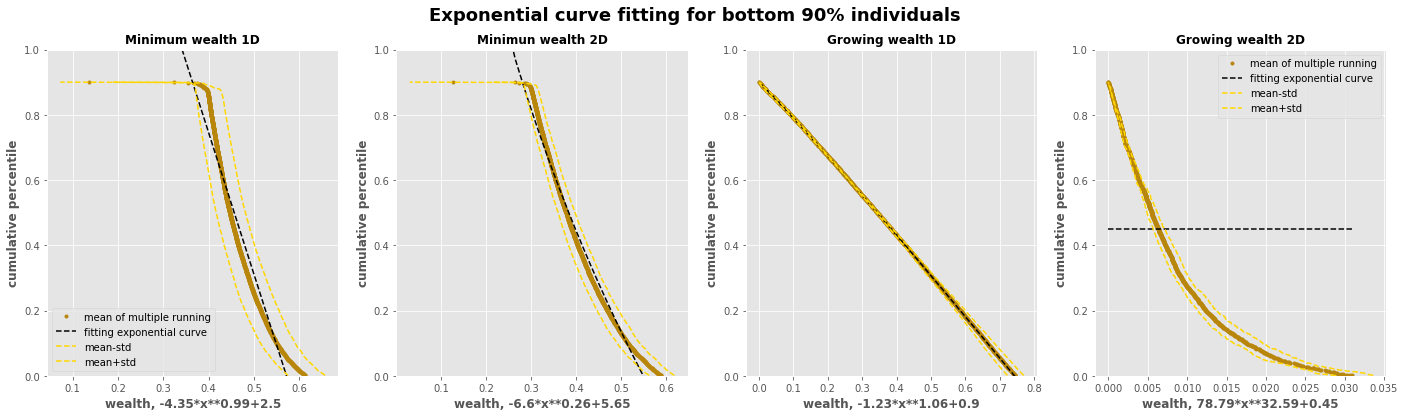

In [252]:
loglog_bottom(wealth_all_models,0.1,model);